In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# settings
import warnings
warnings.filterwarnings("ignore")

In [2]:
def job_completion_alert():
#   from google.colab import output
  import output
  import time

  for i in range(3):
    # Play an audio beep. Any audio URL will do.
    output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
    # Sleep for a few seconds.
    time.sleep(2)
    
## Import up sound alert dependencies
from IPython.display import Audio, display

def allDone():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
## Insert whatever audio file you want above    

In [3]:
# Calculating Precision, Recall and f1-score
def model_score(actual_value,predicted_values):
  from sklearn.metrics import confusion_matrix 
  from sklearn.metrics import accuracy_score 
  from sklearn.metrics import classification_report 
  from sklearn.metrics import recall_score
  
  actual = actual_value
  predicted = predicted_values
  results = confusion_matrix(actual, predicted) 
  
  print('Confusion Matrix :')
  print(results) 
  print('Accuracy Score :',accuracy_score(actual, predicted))
  print('Report : ')
  print(classification_report(actual, predicted))
  print('Recall Score : ')
  print(recall_score(actual, predicted))

In [4]:
df_train = pd.read_csv('./Train.csv')
df_test = pd.read_csv('./Test.csv')
df_train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [5]:
df_train.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE'],
      dtype='object')

In [6]:
df_test.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15'],
      dtype='object')

The dataset has a date column. Will sort the dataset according to date.

Converting the DATE column to a standard pandas date format. Then sort it according to date

In [7]:
df_train['DATE'] = pd.to_datetime(df_train.DATE)
df_test['DATE'] = pd.to_datetime(df_train.DATE)

In [8]:
df_train.sort_values(by=['DATE'], inplace=True)
df_train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
19022,CR_1141,1991-01-01,0,22,22,7,3,8,3,7,2,2,0,2.0,72,142,34,1
13104,CR_2248,1991-01-02,0,33,32,2,1,7,1,1,6,1,249,1.0,72,142,34,1
1617,CR_3131,1991-01-03,1,36,34,2,1,15,10,0,5,1,174,0.0,92,93,0,1
6187,CR_3546,1991-01-04,0,39,39,6,5,8,3,1,6,1,0,1.0,72,62,34,1
1761,CR_821,1991-01-05,1,22,22,7,3,15,10,0,5,1,174,0.0,103,93,48,1


In [9]:
# resetting the dataframe index to new time sorted values
df_train.reset_index(drop=True, inplace=True)
df_train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_1141,1991-01-01,0,22,22,7,3,8,3,7,2,2,0,2.0,72,142,34,1
1,CR_2248,1991-01-02,0,33,32,2,1,7,1,1,6,1,249,1.0,72,142,34,1
2,CR_3131,1991-01-03,1,36,34,2,1,15,10,0,5,1,174,0.0,92,93,0,1
3,CR_3546,1991-01-04,0,39,39,6,5,8,3,1,6,1,0,1.0,72,62,34,1
4,CR_821,1991-01-05,1,22,22,7,3,15,10,0,5,1,174,0.0,103,93,48,1


In [10]:
# For Train Data
df_train['year'] = df_train['DATE'].dt.year
df_train['month'] = df_train['DATE'].dt.month
df_train['day'] = df_train['DATE'].dt.day
df_train['dayofweek'] = df_train['DATE'].dt.dayofweek
df_train['week'] = df_train['DATE'].dt.week
df_train['weekofyear'] = df_train['DATE'].dt.weekofyear
df_train['dayofyear'] = df_train['DATE'].dt.dayofyear
df_train['days_in_month'] = df_train['DATE'].dt.days_in_month

# For Test Data
df_test['year'] = df_test['DATE'].dt.year
df_test['month'] = df_test['DATE'].dt.month
df_test['day'] = df_test['DATE'].dt.day
df_test['dayofweek'] = df_test['DATE'].dt.dayofweek
df_test['week'] = df_test['DATE'].dt.week
df_test['weekofyear'] = df_test['DATE'].dt.weekofyear
df_test['dayofyear'] = df_test['DATE'].dt.dayofyear
df_test['days_in_month'] = df_test['DATE'].dt.days_in_month


# Years unutill current_year
current_year = 2020
df_train['currentYear-year'] = df_train['year'].map(lambda year: current_year-year)
df_test['currentYear-year'] = df_test['year'].map(lambda year: current_year-year)

In [11]:
df_train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,MULTIPLE_OFFENSE,year,month,day,dayofweek,week,weekofyear,dayofyear,days_in_month,currentYear-year
0,CR_1141,1991-01-01,0,22,22,7,3,8,3,7,...,1,1991,1,1,1,1,1,1,31,29
1,CR_2248,1991-01-02,0,33,32,2,1,7,1,1,...,1,1991,1,2,2,1,1,2,31,29
2,CR_3131,1991-01-03,1,36,34,2,1,15,10,0,...,1,1991,1,3,3,1,1,3,31,29
3,CR_3546,1991-01-04,0,39,39,6,5,8,3,1,...,1,1991,1,4,4,1,1,4,31,29
4,CR_821,1991-01-05,1,22,22,7,3,15,10,0,...,1,1991,1,5,5,1,1,5,31,29


In [12]:
# Saving date-sorted dataset to drive
df_train.to_csv('./Train_dateSorted.csv')
df_test.to_csv('./Test_dateSorted.csv')

### Pandas Profiling

In [13]:
# report = ProfileReport(df_train, title='Pandas Profiling Report', explorative=True)
# report

In [14]:
# for idx, feature in enumerate(list(df_train.columns)[2:-1]):
#     fg = sns.FacetGrid(df_train, hue='MULTIPLE_OFFENSE', height=3, aspect=2.5)
#     fg.map(sns.distplot, feature).add_legend()
#     plt.show()

### Checking for NaN values

In [15]:
df_train.isnull().any()

INCIDENT_ID         False
DATE                False
X_1                 False
X_2                 False
X_3                 False
X_4                 False
X_5                 False
X_6                 False
X_7                 False
X_8                 False
X_9                 False
X_10                False
X_11                False
X_12                 True
X_13                False
X_14                False
X_15                False
MULTIPLE_OFFENSE    False
year                False
month               False
day                 False
dayofweek           False
week                False
weekofyear          False
dayofyear           False
days_in_month       False
currentYear-year    False
dtype: bool

### Calculating column median

In [16]:
# median of columns
df_train.median(axis = 0)

X_1                    0.0
X_2                   24.0
X_3                   24.0
X_4                    4.0
X_5                    3.0
X_6                    5.0
X_7                    4.0
X_8                    1.0
X_9                    5.0
X_10                   1.0
X_11                 249.0
X_12                   1.0
X_13                  98.0
X_14                  62.0
X_15                  34.0
MULTIPLE_OFFENSE       1.0
year                2004.0
month                  7.0
day                   15.0
dayofweek              3.0
week                  27.0
weekofyear            27.0
dayofyear            183.0
days_in_month         31.0
currentYear-year      16.0
dtype: float64

In [17]:
selected_columns = ['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']

In [18]:
# replacing nan values with median
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values = np.nan, strategy ='median') 
imputer = imputer.fit(df_train[selected_columns]) 

# Imputing the data      
df_train[selected_columns] = imputer.transform(df_train[selected_columns])
df_test[selected_columns] = imputer.transform(df_test[selected_columns])

### Checking if the dataset is balanced/imbalanced

Class 0 (No): 1068
Class 1 (Yes): 22788
Proportion: 0.05 : 1


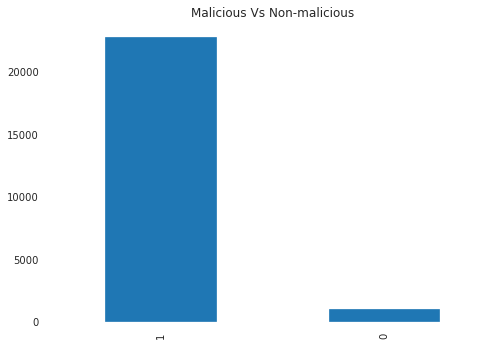

In [19]:
# python check if dataset is imbalanced : https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

target_count = df_train['MULTIPLE_OFFENSE'].value_counts()
print('Class 0 (No):', target_count[0])
print('Class 1 (Yes):', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Malicious Vs Non-malicious')

Therefore, the dataset seems to be heavily imbalanced.

### Splitting Data into train-cv

In [20]:
labels = df_train['MULTIPLE_OFFENSE'].values
df_train.drop(['INCIDENT_ID','DATE','MULTIPLE_OFFENSE'], axis=1, inplace=True)
df_test.drop(['INCIDENT_ID','DATE','MULTIPLE_OFFENSE'], axis=1, inplace=True, errors='ignore')

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(df_train, labels, test_size=0.20, shuffle=False)

### Over Sampling using SMOTE

In [22]:
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
! pip3 install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote_overSampling=SMOTE()

In [23]:
X_train,y_train = smote_overSampling.fit_sample(X_train,y_train)

In [24]:
print(X_train.shape, ' ', y_train.shape)

(36420, 24)   (36420,)


In [25]:
!pip3 install xgboost

### Feature Selection

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

# Preserving the list of original features
feature_cols = X_train.columns

# Keep top k features
selector = SelectKBest(f_classif, k=7)
X_train_new = selector.fit_transform(X_train,y_train)

Now we have our selected features, but it's only the feature values for the training set. To drop the rejected features from the validation and test sets, we need to figure out which columns in the dataset were kept with SelectKBest. To do this, we can use .inverse_transform to get back an array with the shape of the original data.

In [27]:
# Get back the features we've kept, zero out all other features
selected_features = pd.DataFrame(selector.inverse_transform(X_train_new), index=X_train.index, columns=feature_cols)
selected_features.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_15,year,month,day,dayofweek,week,weekofyear,dayofyear,days_in_month,currentYear-year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,34.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,31.0,29.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,34.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,31.0,29.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,31.0,29.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,34.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,31.0,29.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,48.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,31.0,29.0


This returns a DataFrame with the same index and columns as the training set, but all the dropped columns are filled with zeros. We can find the selected columns by choosing features where the variance is non-zero.

In [28]:
# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns = selected_features.columns[selected_features.var() != 0]

# Get the valid dataset with the selected features.
X_train = X_train[selected_columns]
X_cv = X_cv[selected_columns]
df_test = df_test[selected_columns]

### Modelling & Cross-Validation

In [29]:
%%time
# Train multiple models : https://www.kaggle.com/tflare/testing-multiple-models-with-scikit-learn-0-79425
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier

from sklearn.model_selection import TimeSeriesSplit, cross_val_score

models = []

LogisticRegression = LogisticRegression(n_jobs=-1)
LinearSVC = LinearSVC()
KNeighbors = KNeighborsClassifier(n_jobs=-1)
DecisionTree = DecisionTreeClassifier()
RandomForest = RandomForestClassifier()
AdaBoost = AdaBoostClassifier()
Bagging = BaggingClassifier()
ExtraTrees = ExtraTreesClassifier()
GradientBoosting = GradientBoostingClassifier()
LogisticRegressionCV = LogisticRegressionCV(n_jobs=-1)
XGBClassifier = XGBClassifier(nthread=-1)

models.append(("LogisticRegression",LogisticRegression))
models.append(("LinearSVC", LinearSVC))
models.append(("KNeighbors", KNeighbors))
models.append(("DecisionTree", DecisionTree))
models.append(("RandomForest", RandomForest))
models.append(("AdaBoost", AdaBoost))
models.append(("Bagging", Bagging))
models.append(("ExtraTrees", ExtraTrees))
models.append(("GradientBoosting", GradientBoosting))
models.append(("LogisticRegressionCV", LogisticRegressionCV))
models.append(("XGBClassifier", XGBClassifier))

metric_names = ['f1', 'average_precision', 'accuracy', 'precision', 'recall']
# tscv = TimeSeriesSplit(n_splits=5)
results = []
names = []

nested_dict = {}

for name,model in models:
  nested_dict[name] = {}
  for metric in metric_names:
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, scoring=metric, cv=None)
    nested_dict[name][metric] = score.mean()

# # Alarm!!
# job_completion_alert()
allDone()

CPU times: user 1.69 s, sys: 368 ms, total: 2.06 s
Wall time: 2min 8s


In [30]:
import json
print(json.dumps(nested_dict, sort_keys=True, indent=4))

{
    "AdaBoost": {
        "accuracy": 0.9827292696320702,
        "average_precision": 0.9987719077424762,
        "f1": 0.9819797147410518,
        "precision": 0.9963616539067776,
        "recall": 0.9690829214717189
    },
    "Bagging": {
        "accuracy": 0.9887424492037342,
        "average_precision": 0.9899419550548176,
        "f1": 0.9803467191814803,
        "precision": 0.9979024139195521,
        "recall": 0.9770455793520044
    },
    "DecisionTree": {
        "accuracy": 0.9837451949478309,
        "average_precision": 0.9826327067422629,
        "f1": 0.9826330902322814,
        "precision": 0.9978140254869643,
        "recall": 0.9695771554091159
    },
    "ExtraTrees": {
        "accuracy": 0.8898682042833608,
        "average_precision": 0.997716505222065,
        "f1": 0.8620892233755099,
        "precision": 0.9975089442030844,
        "recall": 0.8023064250411862
    },
    "GradientBoosting": {
        "accuracy": 0.9708676551345414,
        "average_precisi

**GradientBoosting** and **AdaBoost** seems to be better performing with highest recall score, without hyperparameter tuning

In [45]:
from pprint import pprint

# print("Predicting using AdaBoost")
# alg = AdaBoost
# alg.fit(X_train, y_train)
# predictions = alg.predict(X_cv)
# pprint(alg.get_params())

In [32]:
# # Without Hyperparameter Tuning:
# model_score(y_cv,predictions)

In [47]:
print("Predicting using GradientBoosting")
alg = GradientBoosting
alg.fit(X_train, y_train)
predictions = alg.predict(X_cv)
pprint(alg.get_params())

Predicting using GradientBoosting
{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [48]:
# Without Hyperparameter Tuning:
model_score(y_cv,predictions)

Confusion Matrix :
[[ 189    5]
 [  50 4528]]
Accuracy Score : 0.9884744341994971
Report : 
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       194
           1       1.00      0.99      0.99      4578

    accuracy                           0.99      4772
   macro avg       0.89      0.98      0.93      4772
weighted avg       0.99      0.99      0.99      4772

Recall Score : 
0.9890782000873743


### Hyperparameter tuning the GradientBoosting Classifier

In [35]:
# from sklearn.model_selection import RandomizedSearchCV
# loss = ['deviance', 'exponential']
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 20)]
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_features = ['auto', 'sqrt', 'log2', 'None']
# max_depth.append(None)

# # bootstrap = [True, False]
# random_grid = {'loss': loss,
#                'n_estimators': n_estimators,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'max_depth': max_depth,
#                'max_features': max_features}
# pprint(random_grid)

In [36]:
# # # GridSearchCV : https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py

# from time import time
# # Utility function to report best scores
# def report(results, n_top=3):
#     for i in range(1, n_top + 1):
#         candidates = np.flatnonzero(results['rank_test_score'] == i)
#         for candidate in candidates:
#             print("Model with rank: {0}".format(i))
#             print("Mean validation score: {0:.3f} (std: {1:.3f})"
#                   .format(results['mean_test_score'][candidate],
#                           results['std_test_score'][candidate]))
#             print("Parameters: {0}".format(results['params'][candidate]))
#             print("")

# # tscv = TimeSeriesSplit(n_splits=5)
# # run randomized search
# n_iter_search = 400
# random_search = RandomizedSearchCV(alg, param_distributions=random_grid, n_iter=n_iter_search, n_jobs=-1, verbose=100)

# start = time()
# random_search.fit(X_train, y_train)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time() - start), n_iter_search))
# report(random_search.cv_results_)

# # # Alarm!!
# # job_completion_alert()
# allDone()

In [37]:
# # With Hyperparameter Tuning:
# predictions_random_search = random_search.predict(X_cv)
# score(y_cv,predictions_random_search)

In [38]:
from sklearn.externals import joblib

In [39]:
# joblib.dump(random_search.best_estimator_, './novartis_classifier.pkl', compress = 1)

In [40]:
# trained_model = joblib.load('./novartis_classifier.pkl')

In [41]:
# # With Hyperparameter Tuning:
# predictions_trained_model = trained_model.predict(X_cv)
# score(y_cv,predictions_trained_model)

## Predicting on test Data

In [49]:
# On test data
trained_model = alg ## Selecting the model to be used
read = pd.read_csv('./Test.csv')
predictions_trained_model_test = trained_model.predict(df_test)

In [50]:
submission = pd.DataFrame({
        "INCIDENT_ID": read["INCIDENT_ID"],
        "MULTIPLE_OFFENSE": predictions_trained_model_test
    })

submission.to_csv('./submission.csv', index=False)

In [51]:
submission.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,0
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1
